# Issue frequency notebook

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
# %load imports.py
# Basic imports
import os

# SQL database
import pymysql

# Classical external libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Import py files for generic functions
from sql import *
from helpers import *


In [9]:
import typing

## Connection to DB

In [10]:
# Connexion database
engine = db_engine()

## Load Useful Data

In [12]:
newspapers_df = read_table('impresso.newspapers', engine)
issues_df = read_table('impresso.issues', engine)

[autoreload of sql failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/justineweber/EPFL/Master/impresso/impresso-metadata-explorer/sql.py", li

In [5]:
newspapers_languages_df = read_table('newspapers_languages', engine)
languages_df = read_table('languages', engine)
LANGUAGES = languages_df.code.unique()

In [6]:
newspapers_metadata_df = read_table('newspapers_metadata', engine)
meta_properties_df = read_table('meta_properties', engine)
PROPERTIES = meta_properties_df.name.unique()

## Number of newspaper issues by year/decade, filtered by provenance / language

In [7]:
# Create new decade column
issues_df['decade'] = issues_df.apply(lambda row: row.year-row.year%10, axis = 1) 

In [30]:
time_granularity = 'decade' # put 'year' to have statistics per year

# NP we are interested in : default is all use functions np_by_language / np_by_property to filter np
#newspapers_select = newspapers_df['id'].unique() #default : all
#newspapers_select = ['GDL', 'JDG', 'NZZ'] # for rapid visualization
newspapers_select = np_by_property(newspapers_metadata_df, meta_properties_df, 'countryCode', 'CH')

issues_df_select = filter_df_by_np_id(issues_df, newspapers_select)

grouping_columns = ['newspaper_id', time_granularity]

nb_issue_per_np_time_id, _, _ = group_and_count(issues_df_select, grouping_columns, 'id', print_=False)

/Users/justineweber/EPFL/Master/impresso/impresso-metadata-explorer/generic_functions.py:18: FutureWarning: `item` has been deprecated and will be removed in a future version


In [35]:
v0, v1, v2 = group_and_count(issues_df_select, grouping_columns, 'id', print_=False)

In [38]:
type(v2)

list

Column last_modified is often NaT, which is why the count is not the same. For that others we always have the same number so we can take any column (and we take 'id').

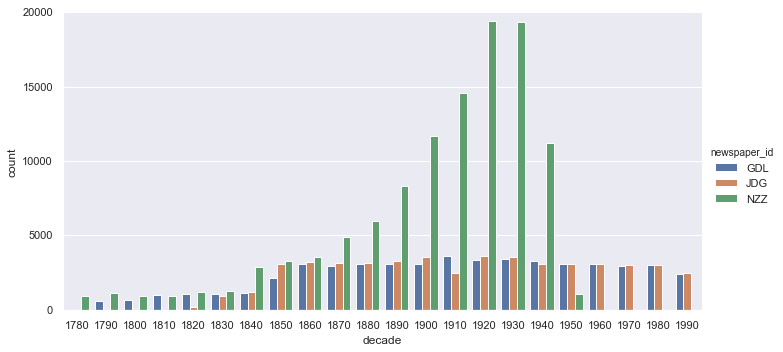

In [9]:
# Plot
sns.catplot(x=time_granularity, y="count", hue="newspaper_id", kind="bar", \
            data=nb_issue_per_np_time_id, height=5, aspect=2);

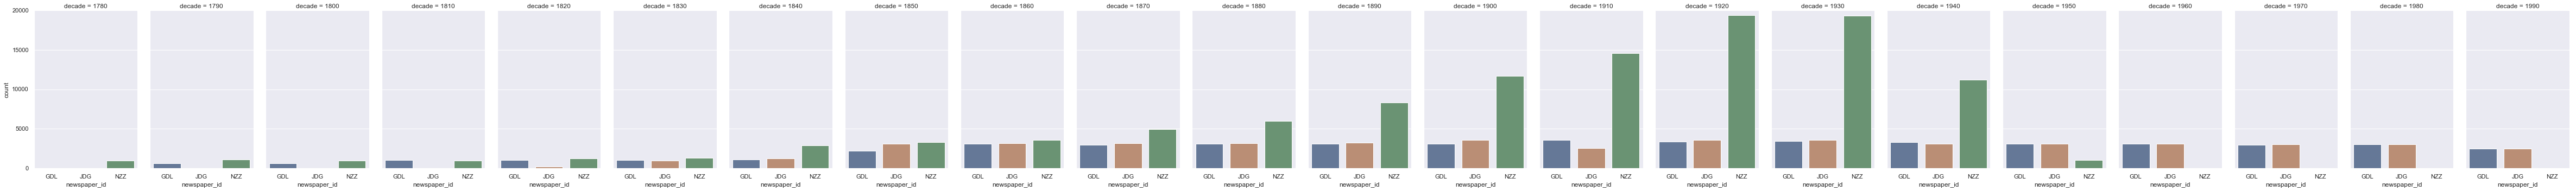

In [10]:
g = sns.catplot(x="newspaper_id", y="count", col=time_granularity, data=nb_issue_per_np_time_id,
                saturation=.5, kind="bar", ci=None, aspect=.6);